In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
file_path = '/content/block3.csv'
bitcoin_df = pd.read_csv(file_path, names=['day','price'])

In [5]:
bitcoin_df 

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [6]:
bitcoin_train_df = bitcoin_df.iloc[:361]
bitcoin_train_df

,day,price
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
356,2021-11-30,57828.45
357,2021-12-01,57025.79
358,2021-12-02,57229.76
359,2021-12-03,56508.48


In [7]:
bitcoin_train_df.shape

(361, 2)

In [8]:
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     361 non-null    object 
 1   price   361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [9]:
bitcoin_train_df['day'] =pd.to_datetime(bitcoin_train_df['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
bitcoin_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     361 non-null    datetime64[ns]
 1   price   361 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [11]:
bitcoin_train_df.set_index('day', inplace=True)
bitcoin_train_df

,price
day,
2020-12-09,18318.87
2020-12-10,18554.15
2020-12-11,18247.76
2020-12-12,18029.36
2020-12-13,18803.44
...,...
2021-11-30,57828.45
2021-12-01,57025.79
2021-12-02,57229.76


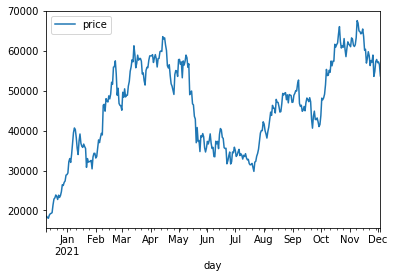

In [12]:
bitcoin_train_df.plot()

In [ ]:
### ARIMA 모델 = AR모델 + I + MA모델
### AR : AutoRegression, 이전데이터들에서 학습한 내용을 가지고 예측
### MA : Moving Average, 이전데이터들의 오차를 반영해서 예측 
### I : Difference, 차이 

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [14]:
model = ARIMA(bitcoin_train_df.values, order=(2,1,2)) # order=() 3가지 모델에 대한 옵션 줘야함 
model

In [15]:
model_fit = model.fit(trend='c', full_output=True, disp=True)
model_fit

In [16]:
model_fit.summary()

# 일반적으로 p값만 보면 된다(probability)
# p = 확률적인 가능성(수치계산해서 나온 가능성)
# p=0.000 -> 내부적으로 문제 없었다. ar, ma 모델 써도 된다 
# 이때 p는 타당하지 않음을 나타내는 지표 p<0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  360
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3225.913
Method:                       css-mle   S.D. of innovations           1882.730
Date:                Fri, 10 Dec 2021   AIC                           6463.825
Time:                        01:37:58   BIC                           6487.142
Sample:                             1   HQIC                          6473.096
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.7901     99.496      0.802      0.423    -115.219     274.799
ar.L1.D.y      0.9185      0.040     23.091      0.000       0.841       0.996
ar.L2.D.y     -0.9440      0.032    -29.400      0.000      -1.007      -0.881
ma.L1.D.y     -0.9573      0.025    -38.376      0.000      -1.006      -0.908
ma.L2.D.y      0.9855      0.026     38.263      0.000       0.935       1.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4865           -0.9070j            1.0292           -0.1716
AR.2            0.4865           +0.9070j            1.0292            0.1716
MA.1            0.4857           -0.8825j            1.0073           -0.1699
MA.2            0.4857           +0.8825j            1.0073            0.1699
-----------------------------------------------------------------------------
"""

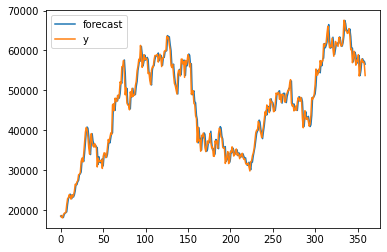

In [19]:
fig = model_fit.plot_predict()

In [23]:
forecast_data=model_fit.forecast(steps=5)
forecast_data

#https://www.statsmodels.org/v0.11.1/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html

(array([53859.90839342, 53891.33862905, 53864.14563435, 53891.32506776,
        54023.78371803]),
 array([1882.73041766, 2611.43093677, 3183.52110652, 3707.37515166,
        4194.6159268 ]),
 array([[50169.8245822 , 57549.99220464],
        [48773.02804487, 59009.64921322],
        [47624.55892156, 60103.73234715],
        [46625.00329334, 61157.64684219],
        [45802.48757252, 62245.07986355]]))

In [24]:
bitcoin_test_df = bitcoin_df[361:]
bitcoin_test_df

,day,price
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41
365,2021-12-09,50511.12


In [25]:
pred_y = forecast_data[0]
pred_y

array([53859.90839342, 53891.33862905, 53864.14563435, 53891.32506776,
       54023.78371803])

In [28]:
pred_y = pred_y.tolist()
pred_y

[53859.90839341877,
 53891.33862904949,
 53864.14563435281,
 53891.32506776393,
 54023.78371803221]

In [29]:
bitcoin_test_df.price

361    49253.86
362    49380.43
363    50564.63
364    50645.41
365    50511.12
Name: price, dtype: float64

In [30]:
bitcoin_test_df.price.values

array([49253.86, 49380.43, 50564.63, 50645.41, 50511.12])

In [31]:
test_y = bitcoin_test_df.price.values
test_y

array([49253.86, 49380.43, 50564.63, 50645.41, 50511.12])

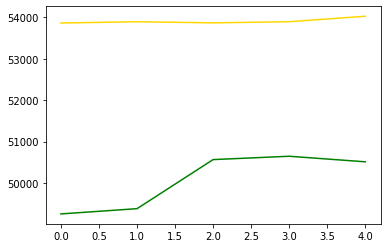

In [32]:
plt.plot(pred_y, color='gold')
plt.plot(test_y, color='green')

In [33]:
forecast_data[2]   #최저[0], 최고[1] -> 그래프로 -> dataset의 양을 3년 이상으로 늘려보자

array([[50169.8245822 , 57549.99220464],
       [48773.02804487, 59009.64921322],
       [47624.55892156, 60103.73234715],
       [46625.00329334, 61157.64684219],
       [45802.48757252, 62245.07986355]])

### bitcoin 3년치 데이터

In [46]:
bitcoin_df3 = pd.read_csv('/content/market-price.csv', names=['day','price'], skiprows=1)
bitcoin_df3

,day,price
0,2018-12-11,3472.98
1,2018-12-12,3407.28
2,2018-12-13,3487.73
3,2018-12-14,3308.11
4,2018-12-15,3242.42
...,...,...
1091,2021-12-06,49380.43
1092,2021-12-07,50564.63
1093,2021-12-08,50645.41
1094,2021-12-09,50511.12


In [47]:
bitcoin_train_df3 = bitcoin_df3.iloc[:1091]
bitcoin_train_df3

,day,price
0,2018-12-11,3472.98
1,2018-12-12,3407.28
2,2018-12-13,3487.73
3,2018-12-14,3308.11
4,2018-12-15,3242.42
...,...,...
1086,2021-12-01,57025.79
1087,2021-12-02,57229.76
1088,2021-12-03,56508.48
1089,2021-12-04,53713.84


In [48]:
bitcoin_train_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1091 non-null   object 
 1   price   1091 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [49]:
bitcoin_train_df3['day'] =pd.to_datetime(bitcoin_train_df3['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
bitcoin_train_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   day     1091 non-null   datetime64[ns]
 1   price   1091 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [51]:
bitcoin_train_df3.set_index('day', inplace=True)

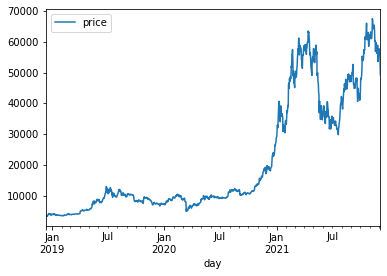

In [52]:
bitcoin_train_df3.plot()

In [53]:
model3 = ARIMA(bitcoin_train_df3.values, order=(2,1,2)) # order=() 3가지 모델에 대한 옵션 줘야함 
model3

In [54]:
model3_fit = model3.fit(trend='c', full_output=True, disp=True)
model3_fit

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [55]:
model3_fit.summary()
# p값 확인

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1090
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9209.892
Method:                       css-mle   S.D. of innovations           1128.035
Date:                Fri, 10 Dec 2021   AIC                          18431.785
Time:                        02:45:32   BIC                          18461.748
Sample:                             1   HQIC                         18443.125
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9973     33.988      1.236      0.217     -24.618     108.613
ar.L1.D.y      0.8432      0.007    122.676      0.000       0.830       0.857
ar.L2.D.y     -0.9790      0.008   -116.250      0.000      -0.995      -0.962
ma.L1.D.y     -0.8702      0.004   -231.484      0.000      -0.878      -0.863
ma.L2.D.y      1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.4306           -0.9144j            1.0107           -0.1799
AR.2            0.4306           +0.9144j            1.0107            0.1799
MA.1            0.4351           -0.9004j            1.0000           -0.1784
MA.2            0.4351           +0.9004j            1.0000            0.1784
-----------------------------------------------------------------------------
"""

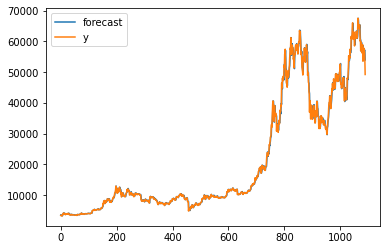

In [57]:
fig = model3_fit.plot_predict()

In [58]:
forecast_data3=model3_fit.forecast(steps=5)
forecast_data3

# 예측값 stderr, [upper bound, lower bound]

(array([49351.46028791, 49108.68415616, 48856.14015305, 48928.57238123,
        49284.5727998 ]),
 array([1128.03543391, 1573.88478024, 1917.67828481, 2222.7064436 ,
        2502.34267867]),
 array([[47140.55146417, 51562.36911165],
        [46023.92667108, 52193.44164124],
        [45097.55978089, 52614.72052522],
        [44572.14780357, 53284.99695888],
        [44380.07127263, 54189.07432697]]))

In [61]:
pred3_y = forecast_data3[0]
pred3_y

array([49351.46028791, 49108.68415616, 48856.14015305, 48928.57238123,
       49284.5727998 ])

In [59]:
bitcoin_test_df3 = bitcoin_df3[1091:]
bitcoin_test_df3

,day,price
1091,2021-12-06,49380.43
1092,2021-12-07,50564.63
1093,2021-12-08,50645.41
1094,2021-12-09,50511.12
1095,2021-12-10,47659.68


In [62]:
pred3_y = pred3_y.tolist()
pred3_y

[49351.4602879105,
 49108.68415616176,
 48856.140153054264,
 48928.572381226055,
 49284.572799801]

In [63]:
test3_y = bitcoin_test_df3.price.values
test3_y

array([49380.43, 50564.63, 50645.41, 50511.12, 47659.68])

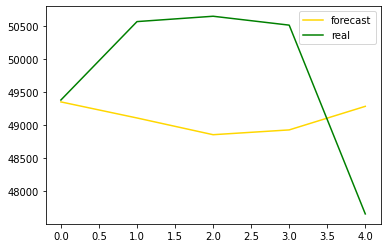

In [75]:
plt.plot(pred3_y, color='gold', label='forecast')
plt.plot(test3_y, color='green', label='real')
plt.legend()
plt.show()

In [ ]:
# ARIMA는 INDEX값을 기준으로 예측

### Additive 모델

In [ ]:
### Additive 모델 = ARIMA + 기간의 trend(경향성) - facebook에서 만듬

In [80]:
from fbprophet import Prophet

file_path = "/content/block3.csv"
bitcoin_df = pd.read_csv(file_path, names = ['ds', 'y'])
bitcoin_df

,ds,y
0,2020-12-09,18318.87
1,2020-12-10,18554.15
2,2020-12-11,18247.76
3,2020-12-12,18029.36
4,2020-12-13,18803.44
...,...,...
361,2021-12-05,49253.86
362,2021-12-06,49380.43
363,2021-12-07,50564.63
364,2021-12-08,50645.41


In [81]:
prophet = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality = True, 
                  weekly_seasonality = True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)
prophet.fit(bitcoin_df)

In [83]:
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
366,2021-12-10,50512.869646,48170.244187,52867.908831
367,2021-12-11,51007.566222,48606.005272,53226.884715
368,2021-12-12,51222.189345,48776.571933,53691.357651
369,2021-12-13,51556.521793,49133.140232,53893.388709
370,2021-12-14,52161.984803,49643.594513,54912.492733


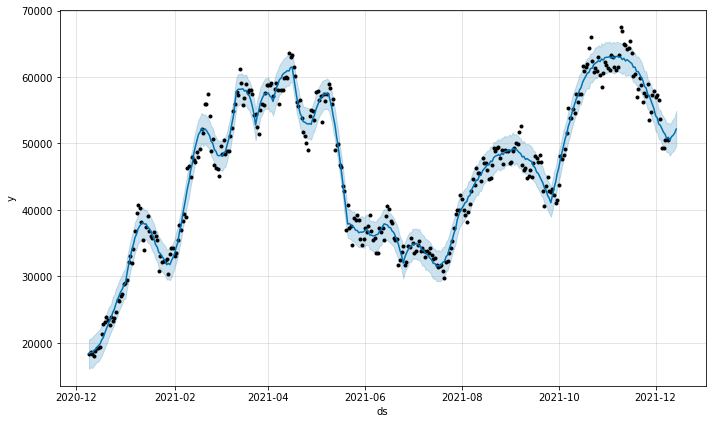

In [84]:
fig1 = prophet.plot(forecast_data)

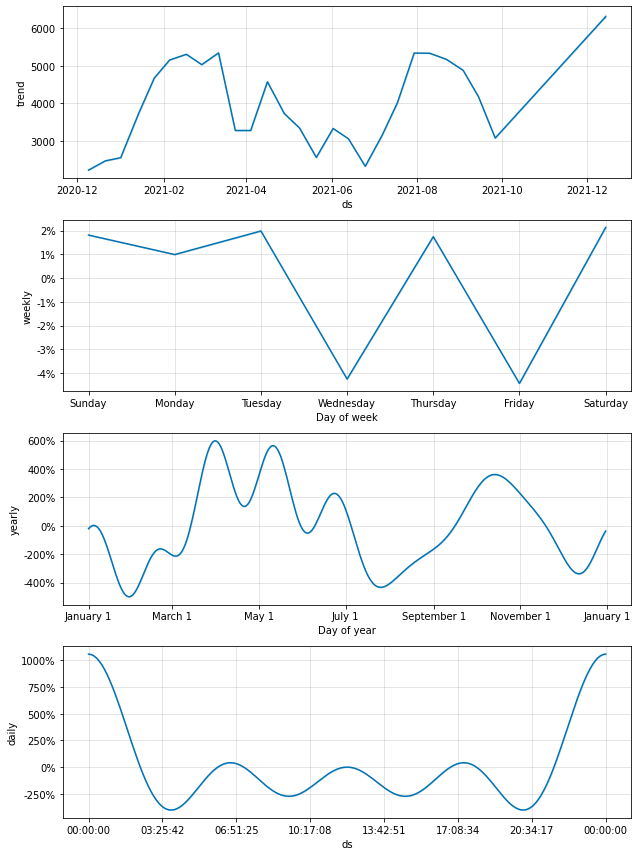

In [85]:
fig2 = prophet.plot_components(forecast_data)

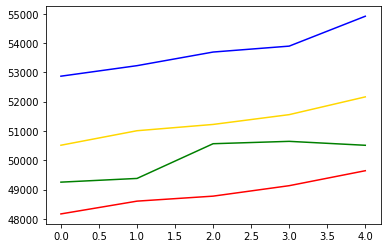

In [86]:
bitcoin_test_df = bitcoin_df[361:]

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = bitcoin_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')